In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import torch
import torchvision

In [ ]:
bgr=cv2.imread("C:/Users/nagat/Dev/cv/2_medical/medical_dataset/val/0/1.png",cv2.IMREAD_COLOR)
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
# Initiate STAR detector
orb = cv2.ORB()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,color=(0,255,0), flags=0)
plt.imshow(img2)

tensor([[0.7019, 0.2683, 0.7932],
        [0.7097, 0.1204, 0.6766],
        [0.5239, 0.1746, 0.7960],
        [0.2521, 0.8383, 0.7064],
        [0.3715, 0.3811, 0.0932]])

In [3]:
# sec: 勾配計算のテスト

x = torch.arange(4, dtype=torch.float32).view(2, 2)
print(x)

x.requires_grad_(True)
print(x)

y = x**2 - 2*x + 1
print(y)

y_ave = y.mean()
print(y_ave)

y_ave.backward()
print(x.grad)
print(y.grad)

tensor([[0., 1.],
        [2., 3.]])
tensor([[0., 1.],
        [2., 3.]], requires_grad=True)
tensor([[1., 0.],
        [1., 4.]], grad_fn=<AddBackward0>)
tensor(1.5000, grad_fn=<MeanBackward0>)
tensor([[-0.5000,  0.0000],
        [ 0.5000,  1.0000]])
None


<ipython-input-3-ae9329847c92>:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(y.grad)


In [2]:

file_list = ["train", "test", "val"]
train_data=[]
val_data=[]
test_data=[]
image_size=(512,512)

dirname="C:/Users/nagat/Dev/cv/2_medical/medical_dataset/train/0/"
files =os.listdir(dirname)
for fname in files:    #あとはForで1ファイルずつ実行されていく
    bgr = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, image_size)
    train_data.append(resized)
train_data=np.array(train_data)

train_data.shape

(4486, 512, 512)

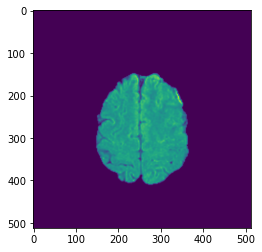

In [3]:
plt.imshow(train_data[120,:,:])

In [ ]:
img = np.asarray(ds[0][0])
print(img[20:25, 10:15], img.shape)

img = np.asarray(ds[0][0].convert('F'))
print(img[20:25, 10:15], img.shape)

plt.imshow(img, cmap='gray', interpolation='None')
plt.show()

In [ ]:
# sec: TorchのTensorを出力する

ds = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=True, download=True, 
    transform=torchvision.transforms.ToTensor())

# sec: MNISTデータのデータ取り出し・表示

img = ds[0][0]
print(img[0, 20:25, 10:15], ds[0][0].shape)

plt.imshow(img[0, :, :], cmap='gray', interpolation='None')
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MyConvNet1(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 5, 3, stride=1, padding=0)
        self.conv2 = nn.Conv2d(5, 10, 3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(10, 15, 3, stride=1, padding=0)
        self.conv4 = nn.Conv2d(15, 20, 3, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(5)
        self.bn2 = nn.BatchNorm2d(10)
        self.bn3 = nn.BatchNorm2d(15)
        self.bn4 = nn.BatchNorm2d(20)
        self.pool1 = nn.MaxPool2d(2)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(20*4*4, 20)
        self.fc2 = nn.Linear(20, 10)
        self.drop1 = nn.Dropout(0.5)
        self.drop2 = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = x.view(-1, 20*4*4)
        x = F.relu(self.fc1(self.drop1(x)))
        x = self.fc2(self.drop2(x))
        return x

TargetNet = MyConvNet1

In [ ]:
# sec: test (順伝播計算 ゼロ値を入力)

model = TargetNet()
y = model(torch.zeros(1, 1, 28, 28))
print(y)

# sec: test (順伝播計算 MNISTデータを入力)

ds = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=True, download=True, 
    transform=torchvision.transforms.ToTensor())
y = model(ds[0][0].view(1, 1, 28, 28))
print(y)

In [ ]:
# sec: データセット

ds_train = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=True, download=True, 
    transform=torchvision.transforms.ToTensor())
dl_train = torch.utils.data.DataLoader(ds_train, batch_size=128, shuffle=True, num_workers=2)
print(len(ds_train))

# sec: 設定

model = TargetNet()
criterion = nn.CrossEntropyLoss()
# case: SGD
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# case: Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# case: end
print(model)

In [ ]:
# sec: 学習ループ

model.train()
for i_ep in range(10): # loop over the dataset multiple times

    loss_sum = 0.0
    for ds_i in dl_train:

        inputs, labels = ds_i

        optimizer.zero_grad()
        outputs = model(inputs) # 順伝播
        loss = criterion(outputs, labels)
        loss.backward() # 逆伝播
        optimizer.step()

        loss_sum += loss.item()

    # sec: print

    print('%dep loss: %.5f' % (i_ep + 1, loss_sum / len(ds_train)))

n_ep = i_ep + 1
print('Finished Training')

In [ ]:
# sec: データセット

ds_vali = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=True, download=True, 
    transform=torchvision.transforms.ToTensor())
ds_vali, _ = torch.utils.data.random_split(ds_vali, [1000, len(ds_vali) - 1000]) # イマイチな書き方
dl_vali = torch.utils.data.DataLoader(ds_vali, batch_size=128, shuffle=False, num_workers=2)
print(len(ds_vali))

In [ ]:
# sec: バリデーション例

model.eval() # 必要 trainのままだとdropoutの効果が残り精度劣化 90.0%で低迷
loss_sum = 0
n_correct = 0
for ds_i in dl_vali:

    inputs, labels = ds_i

    with torch.no_grad():

        outputs = model(inputs) # 順伝播
        loss = criterion(outputs, labels)

        loss_sum += loss.item()

        _, preds = torch.max(outputs, dim=1) # (max values, arg indices)
        n_correct += (preds == labels).sum()

# sec: print

print('loss: %.2e, accuracy: %.2f' % (loss_sum / len(ds_vali), float(n_correct) / len(ds_vali) * 100))

In [ ]:
# sec: 画像を描画

ds_test = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=False, download=True, 
    transform=torchvision.transforms.ToTensor())

x, label = ds_test[np.random.randint(0, len(ds_test))]
plt.imshow(x[0], cmap='gray', interpolation="none")
plt.show()

# sec: 1回の評価

model.eval()
x = x[None] # 1軸を追加
with torch.no_grad():
    y = model(x)

print("予測ラベル:", y.numpy().argmax(axis=1)[0], "| 真値ラベル:", label)

In [ ]:
# sec: データセット

ds_test = torchvision.datasets.MNIST(root="trains/pytorch-mnist", train=False, download=True, 
    transform=torchvision.transforms.ToTensor())
dl_test = torch.utils.data.DataLoader(ds_test, batch_size=128, shuffle=False, num_workers=2)
print(len(ds_test))

In [ ]:
# sec: テスト例

model.eval()
loss_sum = 0
list_pred, list_label = [], []
for ds_i in dl_test:

    inputs, labels = ds_i

    with torch.no_grad():

        outputs = model(inputs) # 順伝播
        loss = criterion(outputs, labels)

        loss_sum += loss.item()

        _, preds = torch.max(outputs, dim=1) # (max values, arg indices)
        list_pred.extend(preds)
        list_label.extend(labels)

list_pred = np.array(list_pred)
list_label = np.array(list_label)

# sec: print

print('loss: %.2e, accuracy: %.2f' % (loss_sum / len(ds_test), (list_pred == list_label).sum() / len(ds_test) * 100))

In [ ]:
# sec: precision, recall, fscore, supportを見る

res_prf = sklearn.metrics.precision_recall_fscore_support(list_label, list_pred)

print("precision, recall, fscore, supportを見る:")
print(res_prf)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(10) - 0.2, res_prf[0], width=0.4, label="precision")
ax.bar(np.arange(10) + 0.2, res_prf[1], width=0.4, label="recall")
ax.plot(np.arange(10), res_prf[2], 'r_', ms=12, label="f")
ax.legend(fontsize=9, framealpha=0.5, labelspacing=0.2)
ax.set_ylim([0.97, 1.0])
plt.show()

In [ ]:
# sec: 混同行列を見る

sklearn.metrics.confusion_matrix(list_label, list_pred)